In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import glob
import json
from pathlib import Path
import random

# Creating the Dataset


In [ ]:
#downloding selfies and invalid photos
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"yourkaggleusename","key":"yourkaggleapikey"}


with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d jigrubhatt/selfieimagedetectiondataset

100% 2.81G/2.81G [00:22<00:00, 97.6MB/s]
100% 2.81G/2.81G [00:22<00:00, 136MB/s] 


In [ ]:
#downloding documents photos
!gdown --id 1Oi88TRcpdjZmJ79WDLb9qFlBNG8q2De6

!unzip 'BID Dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: BID Dataset/RG_Verso/00027851_gt_segmentation.jpg  
  inflating: BID Dataset/RG_Verso/00027851_in.jpg  
  inflating: BID Dataset/RG_Verso/00027852_gt_ocr.txt  
  inflating: BID Dataset/RG_Verso/00027852_gt_segmentation.jpg  
  inflating: BID Dataset/RG_Verso/00027852_in.jpg  
  inflating: BID Dataset/RG_Verso/00027853_gt_ocr.txt  
  inflating: BID Dataset/RG_Verso/00027853_gt_segmentation.jpg  
  inflating: BID Dataset/RG_Verso/00027853_in.jpg  
  inflating: BID Dataset/RG_Verso/00027854_gt_ocr.txt  
  inflating: BID Dataset/RG_Verso/00027854_gt_segmentation.jpg  
  inflating: BID Dataset/RG_Verso/00027854_in.jpg  
  inflating: BID Dataset/RG_Verso/00027855_gt_ocr.txt  
  inflating: BID Dataset/RG_Verso/00027855_gt_segmentation.jpg  
  inflating: BID Dataset/RG_Verso/00027855_in.jpg  
  inflating: BID Dataset/RG_Verso/00027856_gt_ocr.txt  
  inflating: BID Dataset/RG_Verso/00027856_gt_segmentation.jpg  
  inflating: BID Da

In [ ]:
#selecting only the pictures and moving it to a folder:

files = glob.glob("BID Dataset/**/*_in.jpg", recursive=True)

!mkdir documents

for i in files:
  Path(i).rename(f"documents/{i.split('/')[-1]}")

In [ ]:
#moving train selfies to a 'selfies' folder:

!unzip /content/selfieimagedetectiondataset.zip

files = glob.glob("Selfie-Image-Detection-Dataset/Training_data/Selfie/*.jpg", recursive=True)

!mkdir selfies

for i in files:
  Path(i).rename(f"selfies/{i.split('/')[-1]}")

Streaming output truncated to the last 5000 lines.
  inflating: Selfie-Image-Detection-Dataset/Validation_data/NonSelfie/NonSelfie26784.jpg  
  inflating: Selfie-Image-Detection-Dataset/Validation_data/NonSelfie/NonSelfie26785.jpg  
  inflating: Selfie-Image-Detection-Dataset/Validation_data/NonSelfie/NonSelfie26786.jpg  
  inflating: Selfie-Image-Detection-Dataset/Validation_data/NonSelfie/NonSelfie26787.jpg  
  inflating: Selfie-Image-Detection-Dataset/Validation_data/NonSelfie/NonSelfie26788.jpg  
  inflating: Selfie-Image-Detection-Dataset/Validation_data/NonSelfie/NonSelfie26789.jpg  
  inflating: Selfie-Image-Detection-Dataset/Validation_data/NonSelfie/NonSelfie26790.jpg  
  inflating: Selfie-Image-Detection-Dataset/Validation_data/NonSelfie/NonSelfie26791.jpg  
  inflating: Selfie-Image-Detection-Dataset/Validation_data/NonSelfie/NonSelfie26792.jpg  
  inflating: Selfie-Image-Detection-Dataset/Validation_data/NonSelfie/NonSelfie26793.jpg  
  inflating: Selfie-Image-Detection-Dat

In [ ]:
#creating a folder and storing the test selfies

files_test = glob.glob("/content/Selfie-Image-Detection-Dataset/Test_data/Selfie/*.jpg", recursive=True)

!mkdir selfies_test

for i in files_test:
  Path(i).rename(f"selfies_test/{i.split('/')[-1]}")

files_test = glob.glob("/content/documents/*.jpg", recursive=True)

In [ ]:
documents_test = []

while len(documents_test) < (len(files_test) * 0.2):
  random_photo = random.choice(files_test)
  if random_photo not in documents_test:
    documents_test.append(random_photo)

In [ ]:
!mkdir documents_test

In [ ]:
for i in documents_test:
  Path(i).rename(f"documents_test/{i.split('/')[-1]}")

In [ ]:
!mkdir invalid

In [ ]:
invalid_files = glob.glob("Selfie-Image-Detection-Dataset/Training_data/NonSelfie/*.jpg", recursive=True)

In [ ]:
for i in invalid_files:
  Path(i).rename(f"invalid/{i.split('/')[-1]}")

In [ ]:
!mkdir invalid_test

In [ ]:
invalid_test = glob.glob("Selfie-Image-Detection-Dataset/Test_data/NonSelfie/*.jpg", recursive=True)

In [ ]:
for i in invalid_test:
  Path(i).rename(f"invalid_test/{i.split('/')[-1]}")

In [ ]:
!rm -rf 'BID Dataset' 'BID Dataset.zip' Selfie-Image-Detection-Dataset selfieimagedetectiondataset.zip

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import glob
import json
from pathlib import Path
import random

In [ ]:
#storing in memory the images location

files_train = glob.glob("selfies/*.jpg", recursive=True)
docs_train = glob.glob("documents/*.jpg", recursive=True)
invalid_train = glob.glob("invalid/*.jpg", recursive=True)

#checking the ammount of samples
len(files_train) + len(docs_train) + len(invalid_train)

85935

# Preparing images to the model

In [ ]:
#size of the resized image
SIZE = 64

#reading images
raw_img = tf.io.read_file(f"{files_train[0]}")
img = tf.io.decode_image(raw_img, dtype=tf.float32, channels=3)

#converting it to grayscale
img_gray = tf.image.rgb_to_grayscale(img)

#resizing to the SIZE value
image_resized = tf.image.resize(img_gray, (SIZE, SIZE))
train_images = np.asarray(image_resized).reshape(1, SIZE, SIZE, 1)

#doing the process to all images and append them to a list
train_images_list = []
train_images_list.append(train_images)

j = 1
for  i in (files_train[1:] + docs_train + invalid_train):
  raw_img = tf.io.read_file(f"{i}")
  img = tf.io.decode_image(raw_img, dtype=tf.float32, channels=3)
  img_gray = tf.image.rgb_to_grayscale(img)
  image_resized = tf.image.resize(img_gray, (SIZE, SIZE))
  train_sample = np.asarray(image_resized).reshape(1, SIZE, SIZE, 1)
  train_images_list.append(train_sample)

  j += 1
  if (j % 1000) == 0:
     
    print(j)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000


In [ ]:
#reshaping it to a array
train_images = np.array(train_images_list).reshape((85935,  64, 64, 1))

In [ ]:
#free memory space
del train_images_list

In [ ]:
#creating the label
label_selfies = [0 for i in range(len(files_train))] 
label_docs = [1 for i in range(len(docs_train))] 
label_invalid = [2 for i in range(len(invalid_train))] 

train_labels = np.array(label_selfies + label_docs + label_invalid).reshape(-1, 1)

print(train_labels.shape)

(85935, 1)


In [ ]:
tf.keras.backend.clear_session()

# Training the model and testing it

In [ ]:
#setting a random seed
tf.random.set_seed(42)

Epoch 1/300
1075/1075 [==============================] - 16s 14ms/step - loss: 0.3494 - accuracy: 0.8649 - val_loss: 1.3735 - val_accuracy: 0.4132
Epoch 2/300
1075/1075 [==============================] - 15s 14ms/step - loss: 0.2258 - accuracy: 0.9140 - val_loss: 1.0140 - val_accuracy: 0.5880
Epoch 3/300
1075/1075 [==============================] - 14s 13ms/step - loss: 0.2052 - accuracy: 0.9231 - val_loss: 0.6866 - val_accuracy: 0.7392
Epoch 4/300
1075/1075 [==============================] - 14s 13ms/step - loss: 0.1878 - accuracy: 0.9288 - val_loss: 1.4296 - val_accuracy: 0.4596
Epoch 5/300
1075/1075 [==============================] - 14s 13ms/step - loss: 0.1765 - accuracy: 0.9338 - val_loss: 0.7572 - val_accuracy: 0.7072
Epoch 6/300
1075/1075 [==============================] - 14s 13ms/step - loss: 0.1691 - accuracy: 0.9367 - val_loss: 0.8440 - val_accuracy: 0.6672
Epoch 7/300
1075/1075 [==============================] - 15s 14ms/step - loss: 0.1617 - accuracy: 0.9391 - val_loss: 0

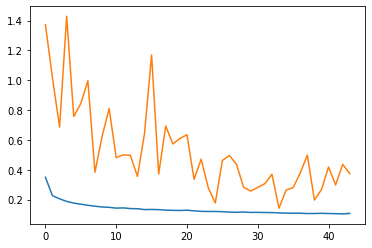

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(SIZE, SIZE, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.RandomCrop(16, 16))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(.1))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(3))


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

history = model.fit(train_images, 
                    train_labels,
                    validation_split=0.2, 
                    callbacks=tf.keras.callbacks.EarlyStopping(patience=10), 
                    epochs=300, 
                    batch_size=64)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
#testing by making a simple prediction
model.predict(train_images[88].reshape(-1, SIZE, SIZE, 1))

array([[ 5.041043 , -8.575204 ,  2.2043731]], dtype=float32)

In [ ]:
#saving the model to a folder
model.save('model_v1')

#zipping the folder so we can download it
!zip -r model_1.zip model_v1

updating: model_v1/ (stored 0%)
updating: model_v1/assets/ (stored 0%)
updating: model_v1/variables/ (stored 0%)
updating: model_v1/variables/variables.data-00000-of-00001 (deflated 22%)
updating: model_v1/variables/variables.index (deflated 63%)
updating: model_v1/keras_metadata.pb (deflated 90%)
updating: model_v1/saved_model.pb (deflated 88%)
